**Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from sklearn.decomposition import PCA

#Primal SVM

In [ ]:
def solve_support_vector_machine_primal(X_data, labels):
    # Get the number of samples and features
    num_samples, num_features = X_data.shape

    # Constructing P and q matrices for the quadratic programming problem
    objective_matrix_P = matrix(np.vstack([np.hstack([np.identity(num_features), np.zeros((num_features, 1))]), np.zeros((1, num_features + 1))]))
    objective_vector_q = matrix(np.zeros((num_features + 1, 1)))

    # Inequality constraints (Ax <= b)
    inequality_matrix_G = matrix(np.concatenate([-labels.reshape((-1, 1)) * X_data, -labels.reshape((-1, 1))], axis=1))
    inequality_vector_h = matrix(-np.ones((num_samples, 1)))

    # Solve the quadratic programming problem
    solution = solvers.qp(objective_matrix_P, objective_vector_q, inequality_matrix_G, inequality_vector_h)

    # Extract the solution
    weights = np.array(solution['x'][:-1])
    bias = solution['x'][-1]

    return weights, bias

# Example usage:
# X_train and y_train represent the training data and labels, respectively.
# weights, bias = solve_support_vector_machine_primal(X_train, y_train)

In [ ]:
# def primal_svm(X, y):
#     # Standardize the features
#     scaler = StandardScaler()
#     X_standardized = scaler.fit_transform(X)

#     # Create a Support Vector Machine model
#     svm_model = SVC(kernel='linear', C=float('inf'))

#     # Fit the model to the data
#     svm_model.fit(X_standardized, y)

#     # Extract the solution
#     w = svm_model.coef_.flatten()
#     b = svm_model.intercept_[0]

#     return w, b

#Dual SVM

In [ ]:
def solve_support_vector_machine_dual(X_data, labels):
    # Reshape labels for consistency
    labels = labels.reshape(-1, 1)

    # Get the number of samples
    num_samples = X_data.shape[0]

    # Compute the kernel matrix H
    kernel_matrix_H = np.dot(labels * X_data, (labels * X_data).T)

    # Objective function coefficients
    objective_matrix_P = matrix(kernel_matrix_H)
    objective_vector_q = matrix(-np.ones((num_samples, 1)))

    # Equality constraint
    equality_matrix_A = matrix(labels.reshape(1, -1))
    equality_vector_b = matrix(0.0)

    # Inequality constraint
    inequality_matrix_G = matrix(-np.eye(num_samples))
    inequality_vector_h = matrix(np.zeros(num_samples))

    # Solve the quadratic programming problem
    solution = solvers.qp(objective_matrix_P, objective_vector_q, inequality_matrix_G, inequality_vector_h, equality_matrix_A, equality_vector_b)

    # Extract the solution
    alpha = np.array(solution["x"])

    # Calculate the weight vector (w)
    weight_vector_w = np.dot((labels * alpha).T, X_data)[0]

    # Identify support vectors
    support_vectors = (alpha > 1e-5).flatten()

    # Calculate the bias (b)
    bias_b = np.mean(labels[support_vectors] - np.dot(X_data[support_vectors], weight_vector_w.reshape(-1, 1)))

    return alpha, weight_vector_w, bias_b

# Example usage:
# X_train and y_train represent the training data and labels, respectively.
# alpha, weights, bias = solve_support_vector_machine_dual(X_train, y_train)

#Plotting



In [ ]:
def plot_support_vector_machine_decision_boundary(X_data, labels, weight_vector, bias_term):
    # Apply PCA for 2D visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_data)

    # Scatter plot of the data points
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap=plt.cm.Paired, marker='o', edgecolors='k')

    # Plot the decision boundary
    ax = plt.gca()
    x_limit = ax.get_xlim()
    y_limit = ax.get_ylim()

    # Create a grid to evaluate the model
    x_grid, y_grid = np.meshgrid(np.linspace(x_limit[0], x_limit[1], 50), np.linspace(y_limit[0], y_limit[1], 50))
    xy_grid = np.column_stack((x_grid.ravel(), y_grid.ravel()))

    # Project grid points back to the original feature space
    xy_original = pca.inverse_transform(xy_grid)

    # Evaluate the decision function on the grid
    decision_function_values = np.dot(xy_original, weight_vector) + bias_term

    # Plot decision boundary and margins
    ax.contour(x_grid, y_grid, decision_function_values.reshape(x_grid.shape), colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

    plt.title('SVM Decision Boundary (2D PCA)')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.show()

# Example usage:
# X_data and labels represent the data and labels, respectively.
# weight_vector and bias_term are the parameters obtained from SVM training.
# plot_support_vector_machine_decision_boundary(X_data, labels, weight_vector, bias_term)

#Dataset 01: 4 Column Dataset

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/SEM_07/OML/Lab10/4ColumnDataset (3).csv")
df1.head()

,feature 1,feature 2,feature 3,feature 4,target
0,0.795644,5.321604,7.989490,-8.146082,-1.0
1,1.482101,0.421096,-2.135405,1.104137,1.0
2,4.206743,1.880775,-0.121839,-1.997864,1.0
3,3.290745,1.847727,-2.346165,-1.077750,1.0
4,1.877044,4.329831,4.551718,-6.746955,-1.0


In [ ]:
df1["target"] = df1["target"].replace(0, -1)

In [ ]:
X_df1 = df1.iloc[:, :-1].to_numpy().astype(float)
y_df1 = df1.iloc[:, -1].to_numpy().astype(float)

In [ ]:
X_df1[:5]

array([[ 0.79564383,  5.32160399,  7.98949033, -8.14608155],
       [ 1.48210147,  0.42109632, -2.13540547,  1.10413654],
       [ 4.20674293,  1.88077478, -0.12183912, -1.99786408],
       [ 3.29074509,  1.84772671, -2.34616508, -1.07775045],
       [ 1.87704379,  4.32983087,  4.55171839, -6.7469548 ]])

##Primal for Dataset 01

     pcost       dcost       gap    pres   dres
 0:  1.4544e-02  1.1353e+01  2e+02  2e+00  8e+02
 1:  1.0048e-01 -1.5058e+01  2e+01  1e-01  7e+01
 2:  1.1184e-01 -2.0427e-01  3e-01  2e-03  8e-01
 3:  6.8221e-02  3.0449e-02  4e-02  5e-16  7e-16
 4:  5.8241e-02  4.8090e-02  1e-02  4e-16  3e-16
 5:  5.6750e-02  5.6046e-02  7e-04  4e-16  1e-14
 6:  5.6640e-02  5.6618e-02  2e-05  4e-16  1e-14
 7:  5.6636e-02  5.6635e-02  1e-06  4e-16  1e-13
 8:  5.6636e-02  5.6636e-02  7e-08  4e-16  3e-12
Optimal solution found.

Primal SVM Results:
Weight vector (w): [ 0.00312195 -0.18308799 -0.14954895  0.23953417]
Bias term (b): 2.083710897180678



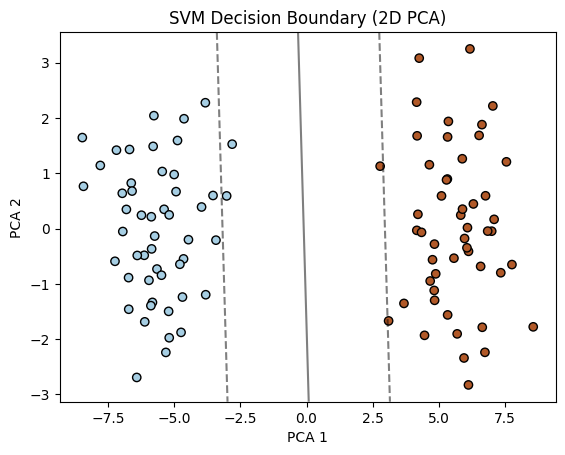

In [ ]:
weights_primal_df1, bias_primal_df1 = solve_support_vector_machine_primal(X_df1, y_df1)

# Display the results
print()
print("Primal SVM Results:")
print("Weight vector (w):", weights_primal_df1.reshape(-1))
print("Bias term (b):", bias_primal_df1)
print()

# Plot the SVM decision boundary
plot_support_vector_machine_decision_boundary(X_df1, y_df1, weights_primal_df1, bias_primal_df1)

##Dual for Dataset 01

     pcost       dcost       gap    pres   dres
 0: -4.5768e+00 -6.9632e+00  2e+02  1e+01  2e+00
 1: -2.1301e+00 -3.6703e-01  2e+01  1e+00  1e-01
 2: -3.7611e-02 -1.1207e-01  3e-01  2e-02  2e-03
 3: -3.0449e-02 -6.8221e-02  4e-02  3e-17  9e-16
 4: -4.8090e-02 -5.8241e-02  1e-02  8e-18  9e-16
 5: -5.6046e-02 -5.6750e-02  7e-04  2e-17  1e-15
 6: -5.6618e-02 -5.6640e-02  2e-05  7e-18  1e-15
 7: -5.6635e-02 -5.6636e-02  1e-06  1e-17  1e-15
 8: -5.6636e-02 -5.6636e-02  7e-08  1e-17  2e-15
Optimal solution found.

Dual SVM Results:
Lagrange multipliers (alphas): [[3.91544934e-11]
 [2.62918949e-11]
 [1.39452570e-10]
 [4.85629543e-11]
 [4.51704748e-02]
 [1.02491564e-10]
 [1.71274355e-10]
 [7.07346973e-11]
 [2.52217151e-11]
 [4.24520072e-11]
 [7.77943502e-11]
 [1.15091093e-10]
 [2.85609574e-10]
 [2.73489091e-11]
 [8.57360407e-11]
 [5.02985863e-11]
 [5.65585616e-11]
 [3.52963392e-11]
 [4.75805520e-11]
 [5.44711820e-11]
 [3.36751046e-11]
 [4.30521753e-11]
 [3.46759075e-11]
 [3.77820850e-11]
 [8.3

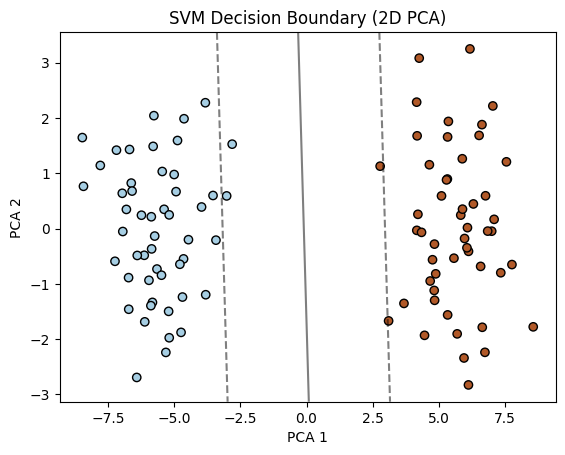

In [ ]:
alphas_dual_df1, weights_dual_df1, bias_dual_df1 = solve_support_vector_machine_dual(X_df1, y_df1)

# Display the results
print()
print("Dual SVM Results:")
print("Lagrange multipliers (alphas):", alphas_dual_df1)
print("Weight vector (w):", weights_dual_df1)
print("Bias term (b):", bias_dual_df1)
print()

# Plot the SVM decision boundary
plot_support_vector_machine_decision_boundary(X_df1, y_df1, weights_dual_df1, bias_dual_df1)

#Dataset 02: Generated Test Dataset

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/SEM_07/OML/Lab10/generated_test.csv", names=["feature1", "feature2", "target"])
df2 = df2.drop(400)
df2.head()

,feature1,feature2,target
0,0.183227,1.606867,0
1,2.673699,-3.069047,1
2,-1.029768,2.487726,0
3,1.330887,5.492054,1
4,0.949222,1.419266,0


In [ ]:
X_df2 = df2.iloc[:, :-1].values
y_df2 = df2.iloc[:, -1].replace('0', '-1').values

In [ ]:
X_df2 = np.array(X_df2, dtype='double')
y_df2 = np.array(y_df2, dtype='double')

In [ ]:
print(X_df2[:5])

[[ 0.183227  1.606867]
 [ 2.673699 -3.069047]
 [-1.029768  2.487726]
 [ 1.330887  5.492054]
 [ 0.949222  1.419266]]


##Primal for Dataset 02

     pcost       dcost       gap    pres   dres
 0: -1.8205e+02 -5.2887e+02  3e+03  5e+01  3e+00
 1: -6.8718e+02 -1.5251e+03  2e+03  4e+01  2e+00
 2: -8.5020e+02 -1.8484e+03  2e+03  3e+01  2e+00
 3: -3.1977e+03 -4.7817e+03  2e+03  2e+01  1e+00
 4: -1.1228e+04 -1.2358e+04  1e+03  2e+01  1e+00
 5: -3.4577e+04 -3.7405e+04  3e+03  2e+01  1e+00
 6: -1.0096e+05 -1.0802e+05  7e+03  2e+01  1e+00
 7: -1.1083e+05 -1.1853e+05  8e+03  2e+01  1e+00
 8: -2.0995e+05 -2.2370e+05  1e+04  2e+01  1e+00
 9: -2.1050e+05 -2.2428e+05  1e+04  2e+01  1e+00
10: -1.2206e+06 -1.2768e+06  6e+04  2e+01  1e+00
11: -1.6595e+07 -1.6935e+07  3e+05  2e+01  1e+00
12: -7.1174e+08 -7.1407e+08  2e+06  2e+01  1e+00
13: -1.3812e+11 -1.3829e+11  2e+08  2e+01  1e+00
14: -1.3994e+11 -1.4011e+11  2e+08  2e+01  1e+00
15: -1.3999e+11 -1.4016e+11  2e+08  2e+01  1e+00
Terminated (singular KKT matrix).

Primal SVM Results:
Weight vector (w): [-2.74658203e-04  1.52587891e-05]
Bias term (b): 0.00025926505687711376



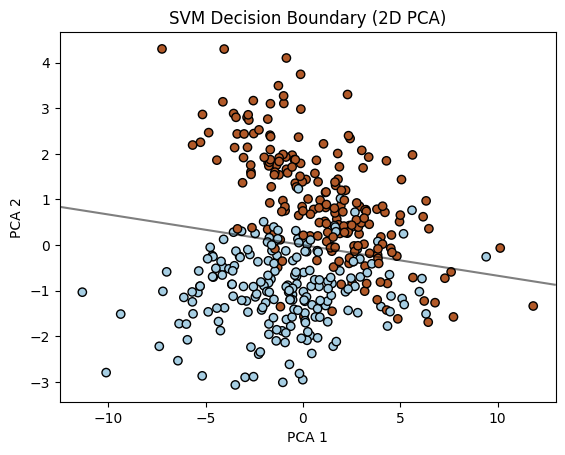

In [ ]:
weights_primal_df2, bias_primal_df2 = solve_support_vector_machine_primal(X_df2, y_df2)

# Display the results
print()
print("Primal SVM Results:")
print("Weight vector (w):", weights_primal_df2.reshape(-1))
print("Bias term (b):", bias_primal_df2)
print()

# Plot the SVM decision boundary
plot_support_vector_machine_decision_boundary(X_df2, y_df2, weights_primal_df2, bias_primal_df2)

##Dual for Dataset 02

     pcost       dcost       gap    pres   dres
 0: -1.8205e+02 -5.2887e+02  3e+03  5e+01  3e+00
 1: -6.8718e+02 -1.5251e+03  2e+03  4e+01  2e+00
 2: -8.5020e+02 -1.8484e+03  2e+03  3e+01  2e+00
 3: -3.1977e+03 -4.7817e+03  2e+03  2e+01  1e+00
 4: -1.1228e+04 -1.2358e+04  1e+03  2e+01  1e+00
 5: -3.4577e+04 -3.7405e+04  3e+03  2e+01  1e+00
 6: -1.0096e+05 -1.0802e+05  7e+03  2e+01  1e+00
 7: -1.1083e+05 -1.1853e+05  8e+03  2e+01  1e+00
 8: -2.0995e+05 -2.2370e+05  1e+04  2e+01  1e+00
 9: -2.1050e+05 -2.2428e+05  1e+04  2e+01  1e+00
10: -1.2206e+06 -1.2768e+06  6e+04  2e+01  1e+00
11: -1.6595e+07 -1.6935e+07  3e+05  2e+01  1e+00
12: -7.1174e+08 -7.1407e+08  2e+06  2e+01  1e+00
13: -1.3812e+11 -1.3829e+11  2e+08  2e+01  1e+00
14: -1.3994e+11 -1.4011e+11  2e+08  2e+01  1e+00
15: -1.3999e+11 -1.4016e+11  2e+08  2e+01  1e+00
Terminated (singular KKT matrix).

Dual SVM Results:
Lagrange multipliers (alphas): [[2.44549023e+08]
 [1.57046783e+08]
 [1.49492187e+08]
 [2.67575241e+08]
 [4.03020997

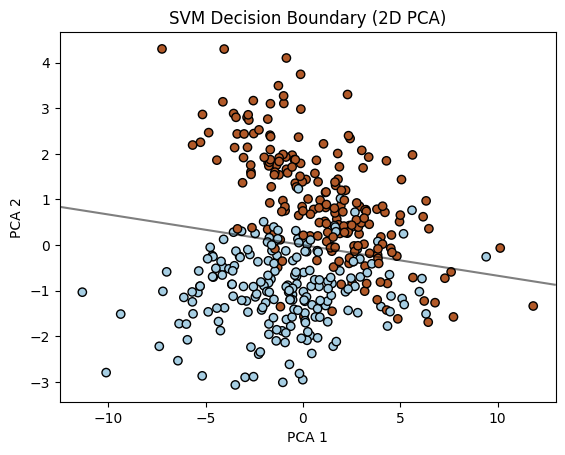

In [ ]:
alphas_dual_df2, weights_dual_df2, bias_dual_df2 = solve_support_vector_machine_dual(X_df2, y_df2)

# Display the results
print()
print("Dual SVM Results:")
print("Lagrange multipliers (alphas):", alphas_dual_df2)
print("Weight vector (w):", weights_dual_df2)
print("Bias term (b):", bias_dual_df2)
print()

# Plot the SVM decision boundary
plot_support_vector_machine_decision_boundary(X_df2, y_df2, weights_dual_df2, bias_dual_df2)

#Dataset 03: Diabetes Dataset

In [ ]:
df3 = pd.read_csv("/content/drive/MyDrive/SEM_07/OML/Lab10/diabetes.csv")
df3.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


In [ ]:
X_df3 = df3.iloc[:, :-1].values
y_df3 = df3.iloc[:, -1].replace(True, 1)
y_df3 = y_df3.replace(False, -1).values

In [ ]:
X_df3 = np.array(X_df3, dtype="double")
y_df3 = np.array(y_df3, dtype="double")

In [ ]:
print(X_df3[:5])

[[6.000e+00 1.480e+02 7.200e+01 3.500e+01 0.000e+00 3.360e+01 6.270e-01
  5.000e+01]
 [1.000e+00 8.500e+01 6.600e+01 2.900e+01 0.000e+00 2.660e+01 3.510e-01
  3.100e+01]
 [8.000e+00 1.830e+02 6.400e+01 0.000e+00 0.000e+00 2.330e+01 6.720e-01
  3.200e+01]
 [1.000e+00 8.900e+01 6.600e+01 2.300e+01 9.400e+01 2.810e+01 1.670e-01
  2.100e+01]
 [0.000e+00 1.370e+02 4.000e+01 3.500e+01 1.680e+02 4.310e+01 2.288e+00
  3.300e+01]]


##Primal for Dataset 03

     pcost       dcost       gap    pres   dres
 0: -4.8632e+02 -1.6940e+03  6e+03  6e+01  3e+00
 1: -2.2030e+03 -4.9536e+03  4e+03  4e+01  2e+00
 2: -7.0770e+03 -8.5718e+03  2e+03  2e+01  1e+00
 3: -1.4977e+04 -1.7546e+04  3e+03  2e+01  1e+00
 4: -1.8149e+04 -2.1169e+04  3e+03  2e+01  1e+00
 5: -4.4809e+04 -5.0709e+04  6e+03  2e+01  1e+00
 6: -4.5985e+04 -5.2022e+04  6e+03  2e+01  1e+00
 7: -5.0545e+04 -5.7104e+04  7e+03  2e+01  1e+00
 8: -1.4126e+05 -1.5579e+05  1e+04  2e+01  1e+00
 9: -1.4263e+05 -1.5729e+05  1e+04  2e+01  1e+00
10: -5.2483e+05 -5.6523e+05  4e+04  2e+01  1e+00
11: -5.4068e+05 -5.8221e+05  4e+04  2e+01  1e+00
12: -2.0687e+06 -2.1954e+06  1e+05  2e+01  1e+00
13: -3.2762e+06 -3.4701e+06  2e+05  2e+01  1e+00
14: -7.6518e+06 -8.0708e+06  4e+05  2e+01  1e+00
15: -7.6977e+06 -8.1190e+06  4e+05  2e+01  1e+00
16: -1.2395e+08 -1.2540e+08  1e+06  2e+01  1e+00
17: -1.6996e+09 -1.7164e+09  2e+07  2e+01  1e+00
Terminated (singular KKT matrix).

Primal SVM Results:
Weight vector (

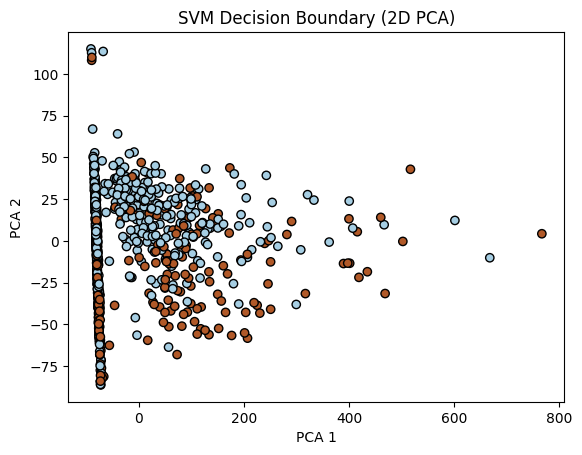

In [ ]:
weights_primal_df3, bias_primal_df3 = solve_support_vector_machine_primal(X_df3, y_df3)

# Display the results
print()
print("Primal SVM Results:")
print("Weight vector (w):", weights_primal_df3.reshape(-1))
print("Bias term (b):", bias_primal_df3)
print()

# Plot the SVM decision boundary
plot_support_vector_machine_decision_boundary(X_df3, y_df3, weights_primal_df3, bias_primal_df3)

##Dual for Dataset 03

     pcost       dcost       gap    pres   dres
 0: -4.8632e+02 -1.6940e+03  6e+03  6e+01  3e+00
 1: -2.2030e+03 -4.9536e+03  4e+03  4e+01  2e+00
 2: -7.0770e+03 -8.5718e+03  2e+03  2e+01  1e+00
 3: -1.4977e+04 -1.7546e+04  3e+03  2e+01  1e+00
 4: -1.8149e+04 -2.1169e+04  3e+03  2e+01  1e+00
 5: -4.4809e+04 -5.0709e+04  6e+03  2e+01  1e+00
 6: -4.5985e+04 -5.2022e+04  6e+03  2e+01  1e+00
 7: -5.0545e+04 -5.7104e+04  7e+03  2e+01  1e+00
 8: -1.4126e+05 -1.5579e+05  1e+04  2e+01  1e+00
 9: -1.4263e+05 -1.5729e+05  1e+04  2e+01  1e+00
10: -5.2483e+05 -5.6523e+05  4e+04  2e+01  1e+00
11: -5.4068e+05 -5.8221e+05  4e+04  2e+01  1e+00
12: -2.0687e+06 -2.1954e+06  1e+05  2e+01  1e+00
13: -3.2762e+06 -3.4701e+06  2e+05  2e+01  1e+00
14: -7.6518e+06 -8.0708e+06  4e+05  2e+01  1e+00
15: -7.6977e+06 -8.1190e+06  4e+05  2e+01  1e+00
16: -1.2395e+08 -1.2540e+08  1e+06  2e+01  1e+00
17: -1.6996e+09 -1.7164e+09  2e+07  2e+01  1e+00
Terminated (singular KKT matrix).

Dual SVM Results:
Lagrange multipli

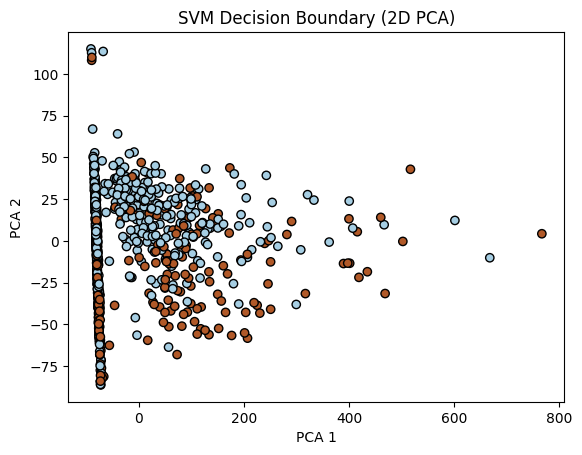

In [ ]:
alphas_dual_df3, weights_dual_df3, bias_dual_df3 = solve_support_vector_machine_dual(X_df3, y_df3)

# Display the results
print()
print("Dual SVM Results:")
print("Lagrange multipliers (alphas):", alphas_dual_df3)
print("Weight vector (w):", weights_dual_df3)
print("Bias term (b):", bias_dual_df3)
print()

# Plot the SVM decision boundary
plot_support_vector_machine_decision_boundary(X_df3, y_df3, weights_dual_df3, bias_dual_df3)

#Dataset 04: Breast Cancer Dataset

In [ ]:
df4 = pd.read_csv("/content/drive/MyDrive/SEM_07/OML/Lab10/breast-cancer.csv")
df4.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df4 = df4.drop(columns=["id"])

In [ ]:
df4["diagnosis"] = df4["diagnosis"].replace('M', 1)
df4["diagnosis"] = df4["diagnosis"].replace('B', -1)
df4.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X_df4 = df4.iloc[:, 1:].to_numpy().astype(np.double)
y_df4 = df4.iloc[:, 0].to_numpy().astype(np.double)

In [ ]:
print(X_df4[:5])

[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

##Primal for Dataset 04

     pcost       dcost       gap    pres   dres
 0:  2.1275e+00  4.4709e+02  3e+03  3e+00  2e+05
 1:  1.0079e+01 -2.1650e+02  3e+03  2e+00  2e+05
 2:  6.4563e+01 -8.9222e+01  3e+03  2e+00  1e+05
 3:  8.7473e+01  6.6760e+02  3e+03  1e+00  1e+05
 4:  1.6360e+02  2.4112e+03  3e+03  1e+00  1e+05
 5:  2.5883e+02  6.1931e+03  3e+03  1e+00  1e+05
 6:  2.9096e+02  1.6891e+04  5e+03  1e+00  1e+05
 7:  4.8374e+02  4.8653e+04  8e+03  1e+00  1e+05
 8:  1.3182e+03  1.0730e+05  1e+04  1e+00  1e+05
 9:  1.2068e+03  1.2635e+05  2e+04  1e+00  1e+05
10:  1.3791e+03  1.5732e+05  2e+04  1e+00  1e+05
11:  2.1242e+03  2.8509e+05  3e+04  1e+00  1e+05
12:  3.4716e+03  7.0520e+05  6e+04  1e+00  1e+05
13:  1.0008e+04  1.6937e+06  1e+05  1e+00  1e+05
14:  5.0314e+04  5.2762e+06  4e+05  1e+00  1e+05
15:  1.2391e+05  1.0073e+07  7e+05  1e+00  9e+04
16:  2.6269e+05  1.5807e+07  1e+06  1e+00  9e+04
17:  2.8991e+05  1.6807e+07  1e+06  1e+00  9e+04
18:  9.1733e+05  3.0621e+07  3e+06  1e+00  9e+04
19:  4.2786e+06  6.52

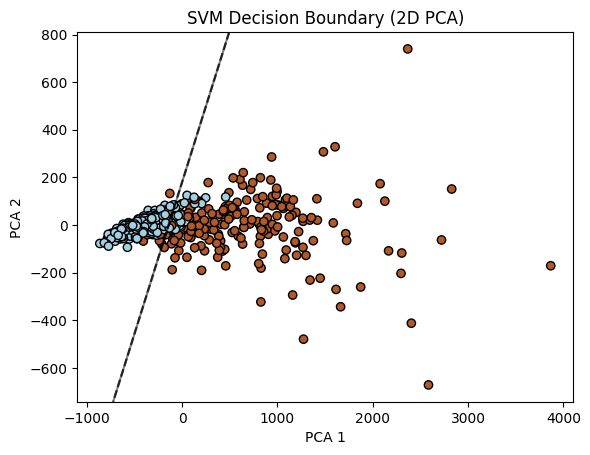

In [ ]:
weights_primal_df4, bias_primal_df4 = solve_support_vector_machine_primal(X_df4, y_df4)

# Display the results
print()
print("Primal SVM Results:")
print("Weight vector (w):", weights_primal_df4.reshape(-1))
print("Bias term (b):", bias_primal_df4)
print()

# Plot the SVM decision boundary
plot_support_vector_machine_decision_boundary(X_df4, y_df4, weights_primal_df4, bias_primal_df4)

##Dual for Dataset 04

     pcost       dcost       gap    pres   dres
 0: -1.3760e+02 -3.8077e+02  3e+03  5e+01  3e+00
 1: -2.9799e+02 -6.5471e+02  3e+03  4e+01  2e+00
 2: -8.3303e+02 -1.4290e+03  3e+03  3e+01  2e+00
 3: -1.5454e+03 -2.4104e+03  3e+03  3e+01  1e+00
 4: -3.1404e+03 -4.5103e+03  3e+03  3e+01  1e+00
 5: -6.7622e+03 -8.8641e+03  3e+03  2e+01  1e+00
 6: -1.7264e+04 -2.0815e+04  5e+03  2e+01  1e+00
 7: -4.8702e+04 -5.5996e+04  8e+03  2e+01  1e+00
 8: -1.0724e+05 -1.2119e+05  1e+04  2e+01  1e+00
 9: -1.2635e+05 -1.4182e+05  2e+04  2e+01  1e+00
10: -1.5739e+05 -1.7588e+05  2e+04  2e+01  1e+00
11: -2.8528e+05 -3.1519e+05  3e+04  2e+01  1e+00
12: -7.0497e+05 -7.6561e+05  6e+04  2e+01  1e+00
13: -1.6925e+06 -1.8244e+06  1e+05  2e+01  1e+00
14: -5.2814e+06 -5.6573e+06  4e+05  2e+01  1e+00
15: -1.0107e+07 -1.0825e+07  7e+05  2e+01  1e+00
16: -1.5939e+07 -1.7136e+07  1e+06  2e+01  1e+00
17: -1.6919e+07 -1.8201e+07  1e+06  2e+01  1e+00
18: -3.0431e+07 -3.3171e+07  3e+06  2e+01  1e+00
19: -6.3439e+07 -7.15

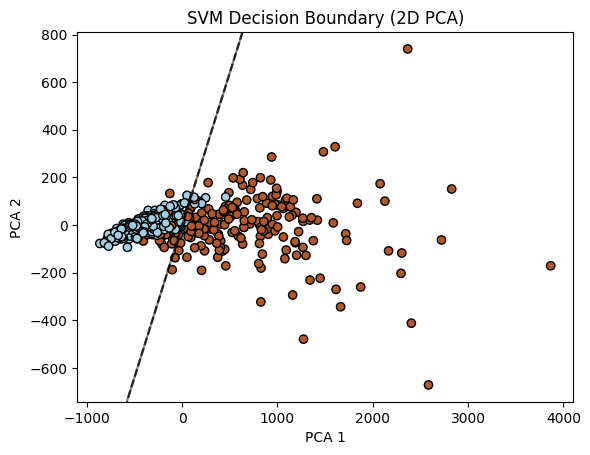

In [ ]:
alphas_dual_df4, weights_dual_df4, bias_dual_df4 = solve_support_vector_machine_dual(X_df4, y_df4)

# Display the results
print()
print("Dual SVM Results:")
print("Lagrange multipliers (alphas):", alphas_dual_df4)
print("Weight vector (w):", weights_dual_df4)
print("Bias term (b):", bias_dual_df4)
print()

# Plot the SVM decision boundary
plot_support_vector_machine_decision_boundary(X_df4, y_df4, weights_dual_df4, bias_dual_df4)